# Les K plus proches voisins & Arbres de décision 

## Partie I: K plus proches voisins (KNN : k nearest neighbors)

##A. Algorithme
Le KNN est un algorithme de classification supervisé. Pour chaque entrée $x_{i}=(x^{1}_{i}, x^{1}_{i}, x^{2}_{i}, ... x^{n}_{i}) $ il faut disposer de la sortie $y_{i}$ correspondante (la classe correspondante)

Pour savoir à quelle classe $y_{i}$ un vecteur x apartient il faut:
- Calculer la distance (euclidienne) du vecteur x à tous les examples $x_{i}$
- trouver les k exemple les plus proche de x
- x appartient à la classe majoritairement representé par ces k éléments 

####Q1. utilisez la fonction ***make_blobs(n_samples,centers, cluster_std,random_state)*** du module ***sklearn.datasets*** pour generer trois classes puis visualiser ces trois classe comme suivants:
*   rouge: y=0
*   blue: y=1
*   vert: y=2
*   Orange: y=3
l'argument ***cluster_std*** affecte le chevauchement entre les classe

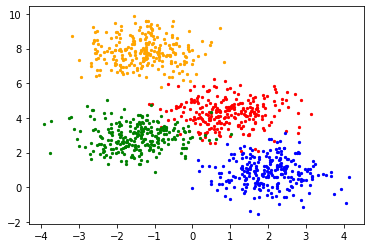

In [24]:
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

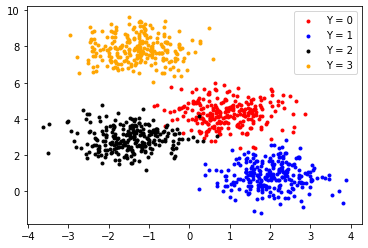

In [2]:
"""
 importing data /  (n_samples : nbr des featurs) -  (centers : nbr des classes) - 
 (cluster_std : distances entre les classes ([0 --> 1] (kol ma qrbo mn 0 kaykunu mba3den kter)))
"""
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.70, random_state=0)

colors = ['red', 'blue', 'black', 'orange'] 

for k, col in enumerate(colors):
    cluster_data = y == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker='.', s=35, label= 'Y = ' + str(k))

plt.legend()
plt.show()

####Q2. Ecrire une fonction knn(x,X_train,y_train,k) pour predire la classe de x avec l'algorithme du kNN 

In [28]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)


ListDistances, D, r = [], [], []
for e in range(X_train.shape[0]) :
    D = [ y[e], np.sqrt((X[e][0] - X_train[e][0])**2 + (X[e][0] - X_train[e][1])**2)]
    r.append(D[-1])
    ListDistances.append(D)
    
arr = np.array(ListDistances)
print(type(arr))
print(arr.shape)



<class 'numpy.ndarray'>
(750, 2)


In [30]:
df = pd.DataFrame(arr, columns = ['y', 'distnace'])

df.sor

,y,distnace
0,3.0,9.392162
1,0.0,2.979413
2,3.0,9.416497
3,2.0,7.192712
4,1.0,8.170206
...,...,...
745,0.0,9.874237
746,3.0,4.867503
747,2.0,5.186459
748,1.0,3.984008


In [ ]:

"""
def Knn(X_train,y_train,k) :
    nDis = KNeighborsClassifier(n_neighbors = k)
    nDis.fit(X_train,y_train)
    return nDis

def classMere(model, X):
    return model.predict(X)
""""""

In [46]:
def TestYourPoint(point) :
    print(f" Voter point choisé est apparteint à la classe : {classMere(Knn(X_train,y_train,k), point)}")

In [47]:
TestYourPoint([[2, 1]])

 Voter point choisé est apparteint à la classe : [1]


###Q3. A quelle classe apartient les trois points suivants: x1=(-2,5); x2(-1,6) et x3=(0,2) pour k=3,5 et 7 respectivement

##B. Utilisation des modules python
Le module ***KNeighborsClassifier*** de ***sklearn.neighbors*** permet de initialiser un modele kNN avec un parametre k ***KNeighborsClassifier(k)*** en entraine ce modele avce la sa méthode ***fit(x_train,y_train)*** puis la prediction avec sa methode ***predict(x)***
####Q1. Utiliser 75% des données precedentes pour entrainer ce modèle puis afficher la matrice de confusion et la precision de ce modèle pour k=1, 3, 5 ... 11
Utiliser la méthode accuracy_score(y_test, y_pred) de sklearn.metrics pour calculer la precision (accuracy) du modèle

####Q2. Trace la precision de ce modele en fonction de k. quel valeur de k choisir pour ce problème?

